# Plotting in Matplotlib

Let's introduce some of the fundamentals with plotting with matplotlib:

- Introduce basic plots
- Customization
- Advanced subplotting
- Colormaps and custom colormaps; matplotlib colorcycle
- Annotation and text
- Custom legends
- Saving figures

<img src="matplotlib.png" alt="Matplotlib" style="width:250px;"/>


In [1]:
#We'll need matplotlib.pyplot, plus numpy:

import matplotlib.pyplot as plt
import numpy as np

In [2]:
## We'll also use these for custom colormaps:
#######

from matplotlib import cm
from matplotlib.colors import ListedColormap


In [3]:
#For custom legend:

from matplotlib.patches import Patch
from matplotlib.lines import Line2D


In [4]:
## And these will come in handy for special inset axes and colorbars:

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1 import make_axes_locatable

### Some minimal plots

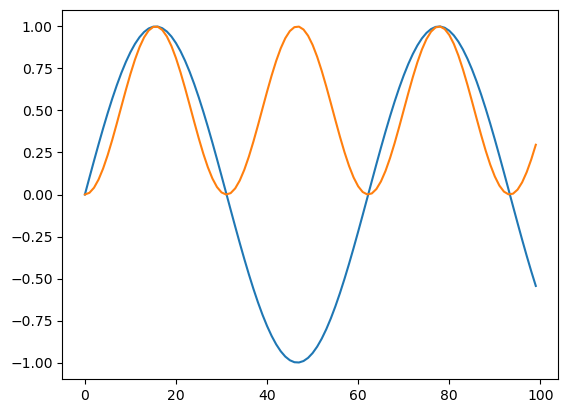

In [5]:
#Bare bones plot:
#######

x = np.linspace(0,10,100)
y = np.sin(x)

#And can just plot with good ole' matplotlib
plt.plot(y)

#Adds a plot to same figure:
plt.plot(y**2);

matplotlib.axes._subplots.AxesSubplot

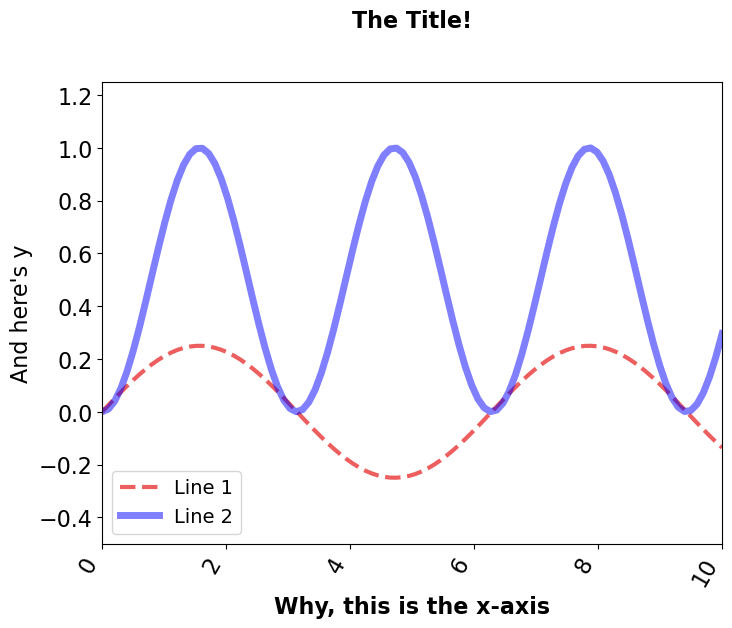

In [7]:
#Let's now use an AxesSubplot object for plotting and customize a little
#######

fig1, ax1 = plt.subplots(1, 1, figsize=(8, 6)) #, dpi=300)


#Make a little nicer
ax1.plot(x, y/4, linewidth=3, linestyle="dashed", color=(.9, .1, .1, .7), label="Line 1")
ax1.plot(x, y**2, linewidth=5, color='blue', alpha=.5, label="Line 2")


#Let's set labels and fontsizes:
ax1.set_xlabel('Why, this is the x-axis', fontsize=16, fontweight='bold')
ax1.set_ylabel('And here\'s y', fontsize=16)
ax1.tick_params(axis='both', labelsize=16)
ax1.set_xticks(ax1.get_xticks(), weight='bold')


#We can rotate the tick labels:
ax1.set_xticks(ax1.get_xticks(), ax1.get_xticklabels(), rotation=60, ha='right')

#Alternative:
#ax1.tick_params(axis='x', rotation=60)


#Title and legend:
#Add a y offset to the title:
ax1.set_title("The Title!", fontsize=16, fontweight="bold", y = 1.1);
ax1.legend(fontsize=14, loc='lower left')


#Plus, let's customize the x and y limits:
ax1.set_xlim([0, 10]);
ax1.set_ylim([-.5, 1.25]);

#And confirm the type:
type(ax1)

### Scatter plot:

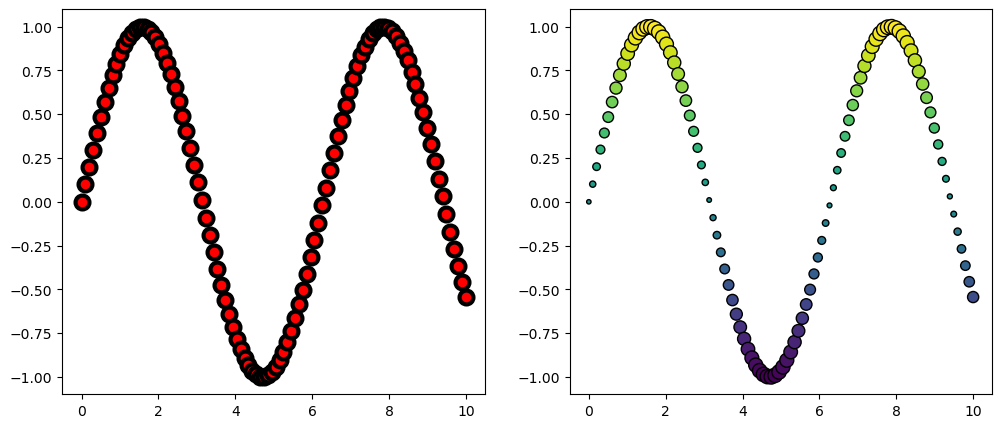

In [8]:
## Scatter Plots:

#Note the subplotting:

#We can make a "scatter plot" like this:
fig1, ax1 = plt.subplots(1, 2, figsize=(12, 5))

ax1[0].plot(x, y, 'o', markersize = 10, markerfacecolor='red', markeredgecolor='black', markeredgewidth=3)


#Or like this:
#Or use a designated scatter plot: 
ax1[1].scatter(x, y, c = y, s = abs(y)*100 + 10, cmap='viridis', edgecolor='black')


#### Note scaling: `markersize` in `plot` vs. `s` in `scatter`

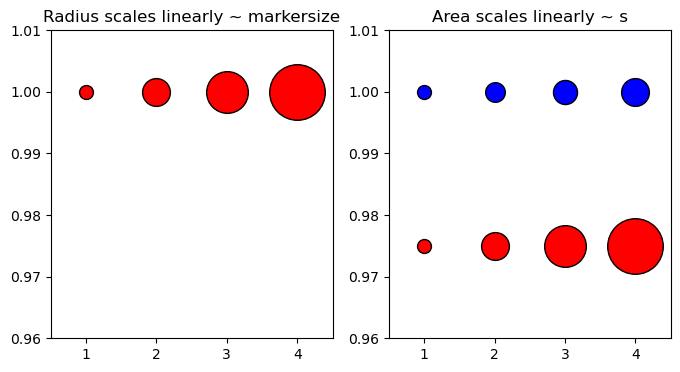

In [9]:
#Note how size scaling differs:
fig1, ax1 = plt.subplots(1, 2, figsize=(8, 4))

for k in range(1,5):
    
    #Markersize
    ax1[0].plot(k, 1, 'o', markersize = k*10, markerfacecolor='red', markeredgecolor='black', markeredgewidth=1)
    ax1[0].set_title('Radius scales linearly ~ markersize')
    
    #s
    ax1[1].scatter(k, 1, s = k*100, c = 'blue', edgecolor='black')
    ax1[1].scatter(k, .975, s = k**2*100, c = 'red', edgecolor='black')
    ax1[1].set_title('Area scales linearly ~ s')
    
    
#Set limits
for i in range(2):
    ax1[i].set_xlim([.5,4.5])
    ax1[i].set_ylim([.96,1.01])

#### Another neat scatter plot:

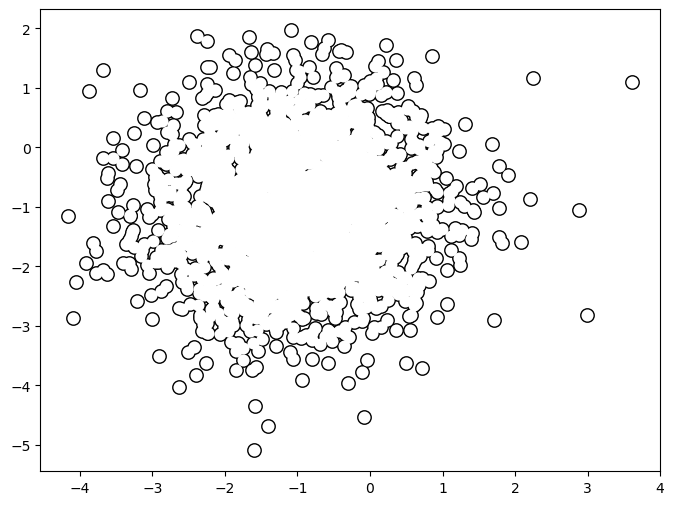

In [11]:
#We can get a kind of boundary plot like this:

#######
fig1, ax1 = plt.subplots(1, 1, figsize=(8, 6))

#Random standard normals:
x = np.random.normal(-1, 1, 2500)
y = np.random.normal(-1, 1, 2500)

#Note the lw argument
ax1.scatter(x, y, s=75, c="black", lw=2)
ax1.scatter(x, y, s=75, c="white", lw=0)


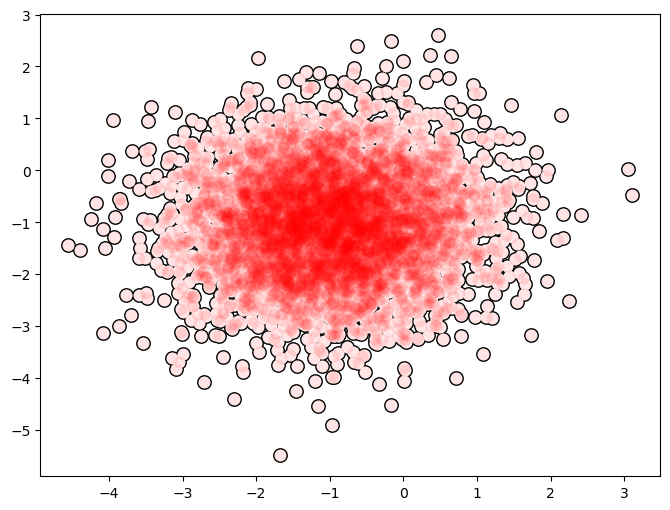

In [12]:
### Add a partially transparent interior:
#######
fig1, ax1 = plt.subplots(1, 1, figsize=(8, 6))

x = np.random.normal(-1, 1, 5000)
y = np.random.normal(-1, 1, 5000)

ax1.scatter(x, y, s=75, c="black", lw=2)
ax1.scatter(x, y, s=75, c="white", lw=0)
ax1.scatter(x, y, s=75, c="red", lw=0, alpha=.1)

Above is adapted from one of the matplotlib cheatsheets:

- https://matplotlib.org/cheatsheets/

These are really useful, check them out!

### Some more QuickStart stuff

- Some minimal plots, adapted partially from the matplotlib for beginners handout at 

<BarContainer object of 10 artists>

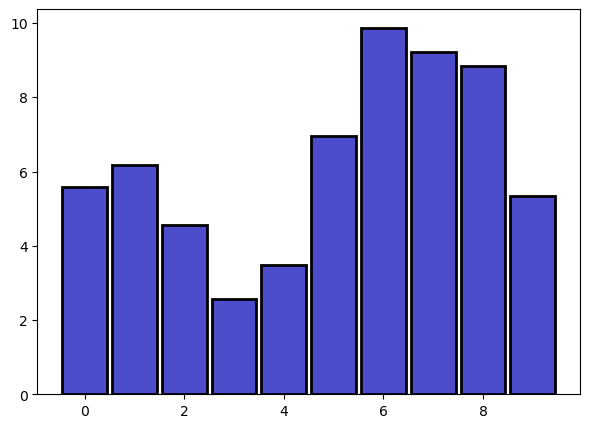

In [15]:
## Bar Plot:
######

fig1, ax1 = plt.subplots(1, 1, figsize=(7, 5))

x = np.arange(10)
y = np.random.uniform(1, 10, 10)

ax1.bar(x,y, edgecolor='black', color=(.3, .3, .8), linewidth=2, width=.9)

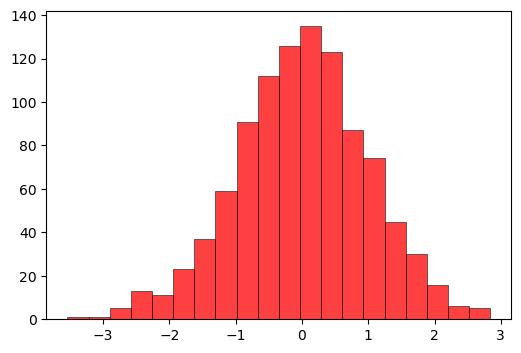

In [18]:
## Histogram

fig, ax1 = plt.subplots(1,1, figsize=(6, 4))

Z = np.random.normal(size=1000)

ax1.hist(Z, bins = 20, rwidth = 1, facecolor='red', \
            edgecolor='black', linewidth = .5, alpha=0.75);


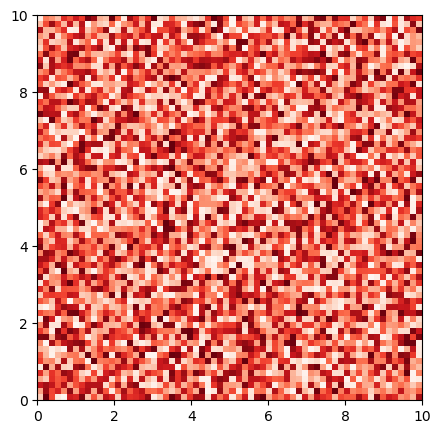

In [23]:
## imshow:
######

fig1, ax1 = plt.subplots(1, 1, figsize=(5, 5))

#Get grid of random uniforms:
Z = np.random.uniform(0, 1, (64,64))

#Use imshow:
ax1.imshow(Z, extent=[0, 10, 0, 10], cmap='Reds');

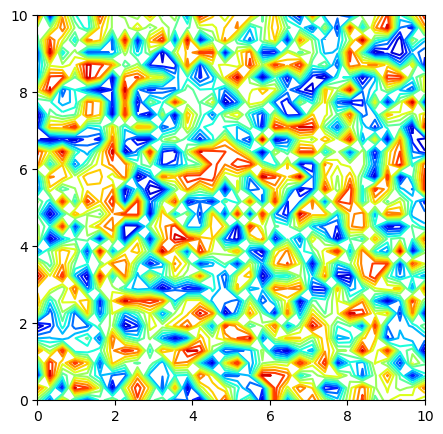

In [25]:
#Contour plot:
#####

fig1, ax1 = plt.subplots(1, 1, figsize=(5, 5))

#Get grid of random uniforms:
Z = np.random.uniform(0, 1, (32,32))

#And contour or contourf
ax1.contour(Z, 15, extent=[0, 10, 0, 10], cmap='jet');

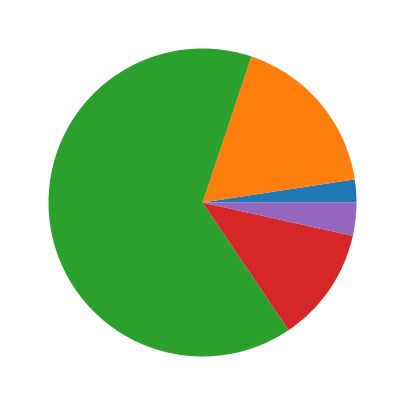

In [29]:
#Pie plot:
#####

fig1, ax1 = plt.subplots(1, 1, figsize=(5, 5))

#Get a few randoms again:
Z = np.random.uniform(0, 1, 5)

#And contour or contourf
ax1.pie(Z);

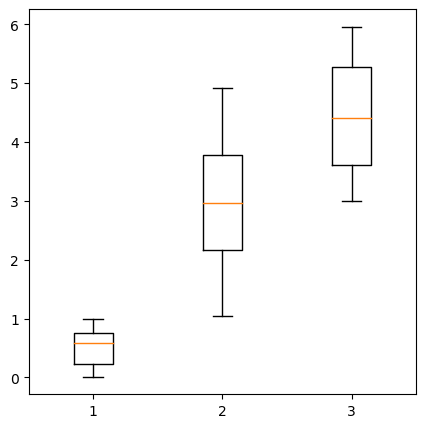

In [31]:
#Box plot:
#####

fig1, ax1 = plt.subplots(1, 1, figsize=(5, 5))

#Get a matrix of randoms:
Z = np.zeros([100,3])
Z[:,0] = np.random.uniform(0, 1, 100)
Z[:,1] = np.random.uniform(1, 5, 100)
Z[:,2] = np.random.uniform(3, 6, 100)

#And boxplot
ax1.boxplot(Z);

### Subplots and *Advanced Subplots*

- Let's set up some subplots...

<img src="sb_darkness.jpg" alt="This is...Advanced Darkness" style="width:400px;"/>

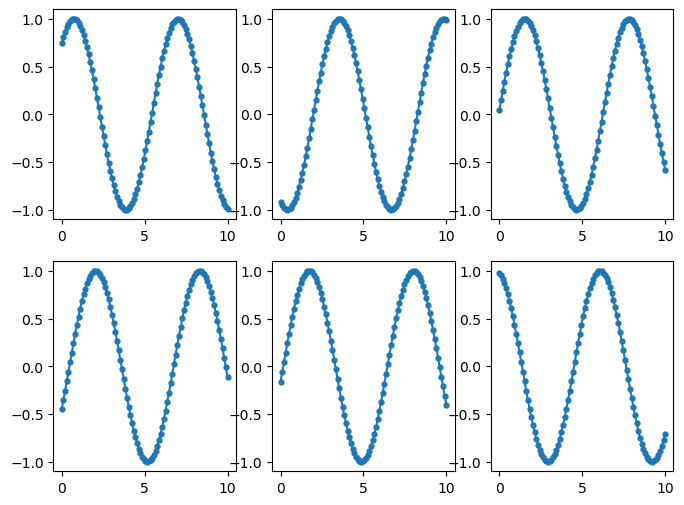

In [32]:
#Simplest method
################

fig1, ax1 = plt.subplots(2,3,figsize=(8,6))


#And proceed:
for i in range(2):
    for j in range(3):
        
        x = np.linspace(0,10,100)
        y = np.sin(x + np.random.uniform(-2,2))

        ax1[i, j].plot(x, y, marker = '.', markersize = 7)

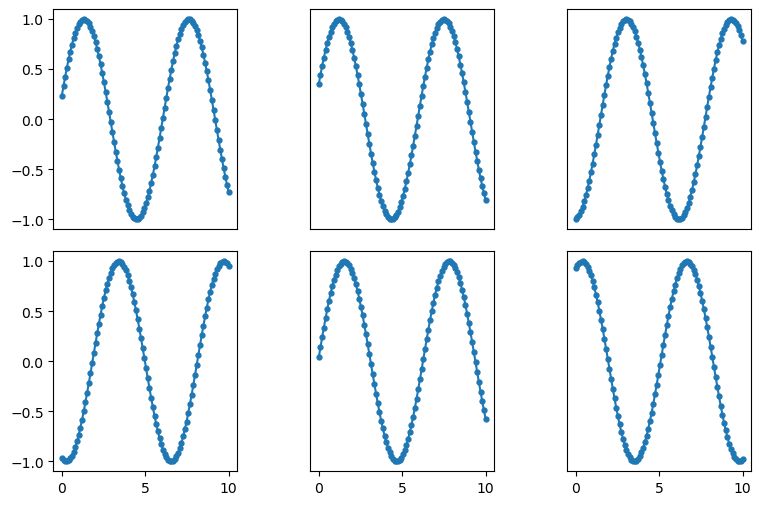

In [35]:
#Note some edits:
######

fig1, ax1 = plt.subplots(2,3,figsize=(9,6))

#Sometimes this is useful:     
ax1 = ax1.flatten()

#And proceed:
for i in range(6):
    x = np.linspace(0,10,100)
    y = np.sin(x + np.random.uniform(-2,2)) 

    ax1[i].plot(x, y, marker = '.', markersize = 7)

    
    #Also often useful:
    ####
    if (i < 3):
        ax1[i].set_xticks([])
    if (i % 3 != 0):
        ax1[i].set_yticks([])
        
#And can use subplots_adjust:
plt.subplots_adjust(hspace=.1, wspace=.4)

#### Grab the default colorcycle:

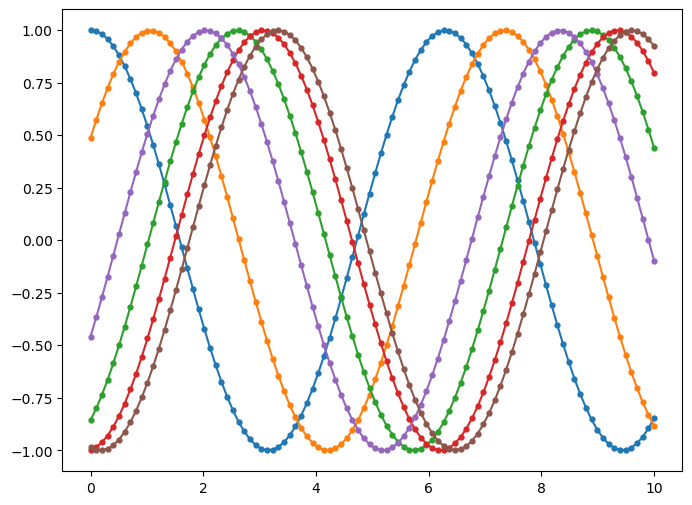

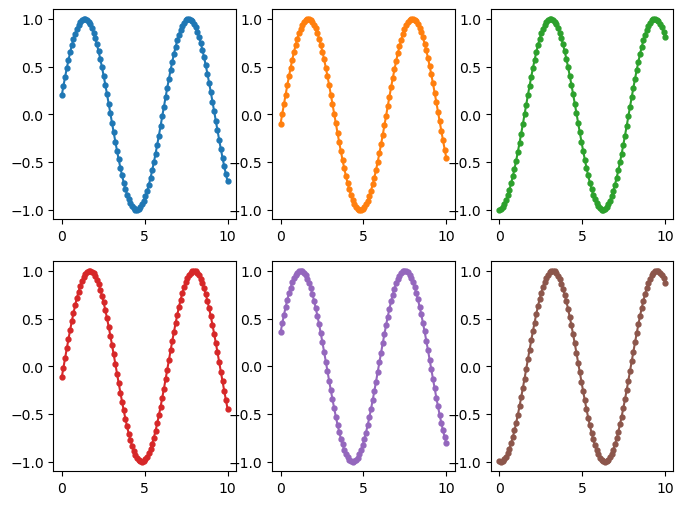

In [37]:
#Note, compare colors:
fig1, ax1 =  plt.subplots(1,1,figsize=(8,6))

#All in one plot:
for i in range(6):
    x = np.linspace(0,10,100)
    y = np.sin(x + np.random.uniform(-2,2)) 

    ax1.plot(x, y, marker = '.', markersize = 7)
    

#Can get the default colorcycle
######
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']


#And can set colors within subplots:
#########

fig1, ax1 = plt.subplots(2,3,figsize=(8,6))

ax1 = ax1.flatten()

for i in range(6):
    x = np.linspace(0,10,100)
    y = np.sin(x + np.random.uniform(-2,2)) 

    ax1[i].plot(x, y, marker = '.', markersize = 7, color=colors[i])

    


In [38]:
#Colors?
colors

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

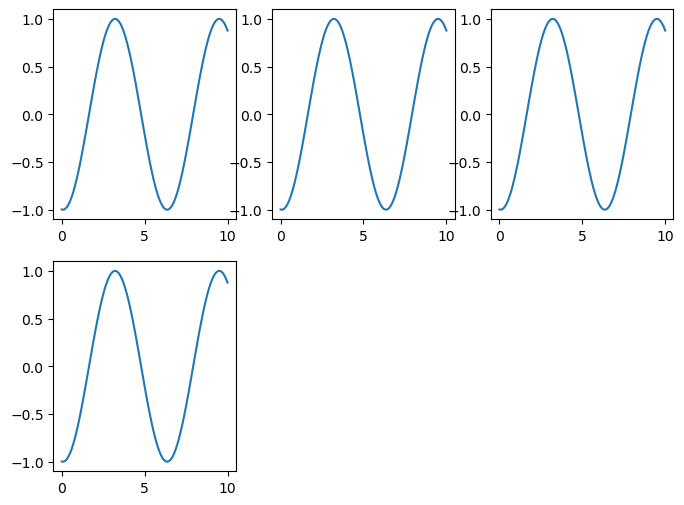

In [41]:
## "Turn off" unused subplots?
###########

fig1, ax1 = plt.subplots(2,3,figsize=(8,6))

ax1 = ax1.flatten()
for i in range(4):
    ax1[i].plot(x, y)

    
#Use this!!
ax1[5].set_axis_off()
ax1[4].set_axis_off()   

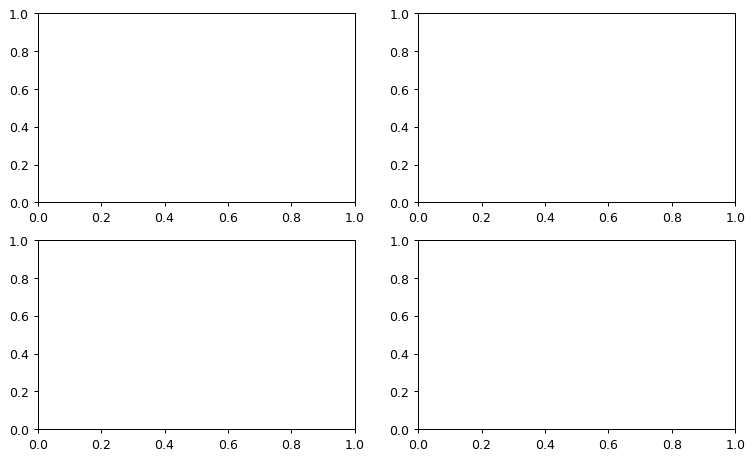

In [42]:
#Alternative subplot method
###########################

#Can set up grids of subplots using add_subplot:

#Start with a nice figure
fig = plt.figure(figsize=(10,6), dpi=90)

ax1 = fig.add_subplot(2, 2, 1) 
ax2 = fig.add_subplot(2, 2, 2)  
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

#Can make a nested tuple or list of ax for easier reference:
ax = [[ax1, ax2], [ax3, ax4]]

Text(0.5, 0.98, 'There Can Be Only One')

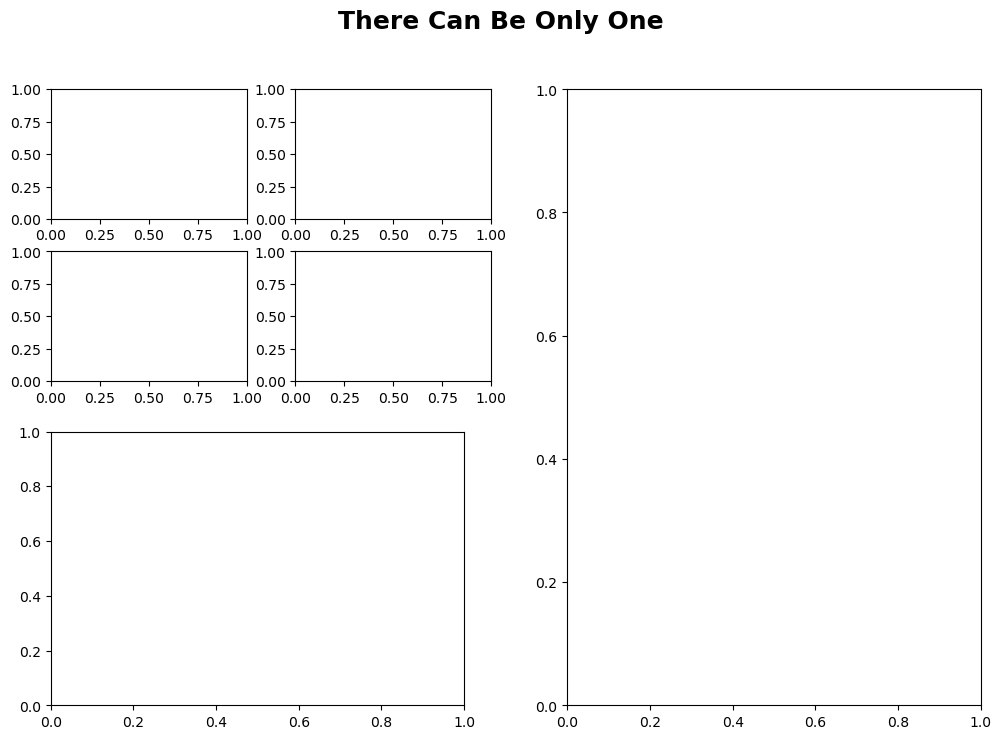

In [43]:
#This style is more useful in creating custom grids:
#Example:

fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(4, 4, 1) 
ax2 = fig.add_subplot(4, 4, 2)
ax3 = fig.add_subplot(4, 4, 5)
ax4 = fig.add_subplot(4, 4, 6)

ax5 = fig.add_subplot(2, 2, 3)
ax6 = fig.add_subplot(1, 2, 2)


#Again, we can also adjust space around subplots:
###
plt.subplots_adjust(wspace=0.25, hspace=0.25)

#And add one title to rule them all!
####
plt.suptitle('There Can Be Only One', fontweight='bold', fontsize=18)

#### Inset axes

Let's preview some geopandas here as well...

In [44]:
#We'll need this:

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [46]:
#Some built-in geopandas teaching data:
#Recall we had:
import geopandas as gpd

#"gdf" is a common generic variable name = GeoDataFrame
gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [47]:
gdf.head()

pop_est      continent                      name iso_a3  gdp_md_est  \
0     889953.0        Oceania                      Fiji    FJI        5496   
1   58005463.0         Africa                  Tanzania    TZA       63177   
2     603253.0         Africa                 W. Sahara    ESH         907   
3   37589262.0  North America                    Canada    CAN     1736425   
4  328239523.0  North America  United States of America    USA    21433226   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...

<AxesSubplot: >

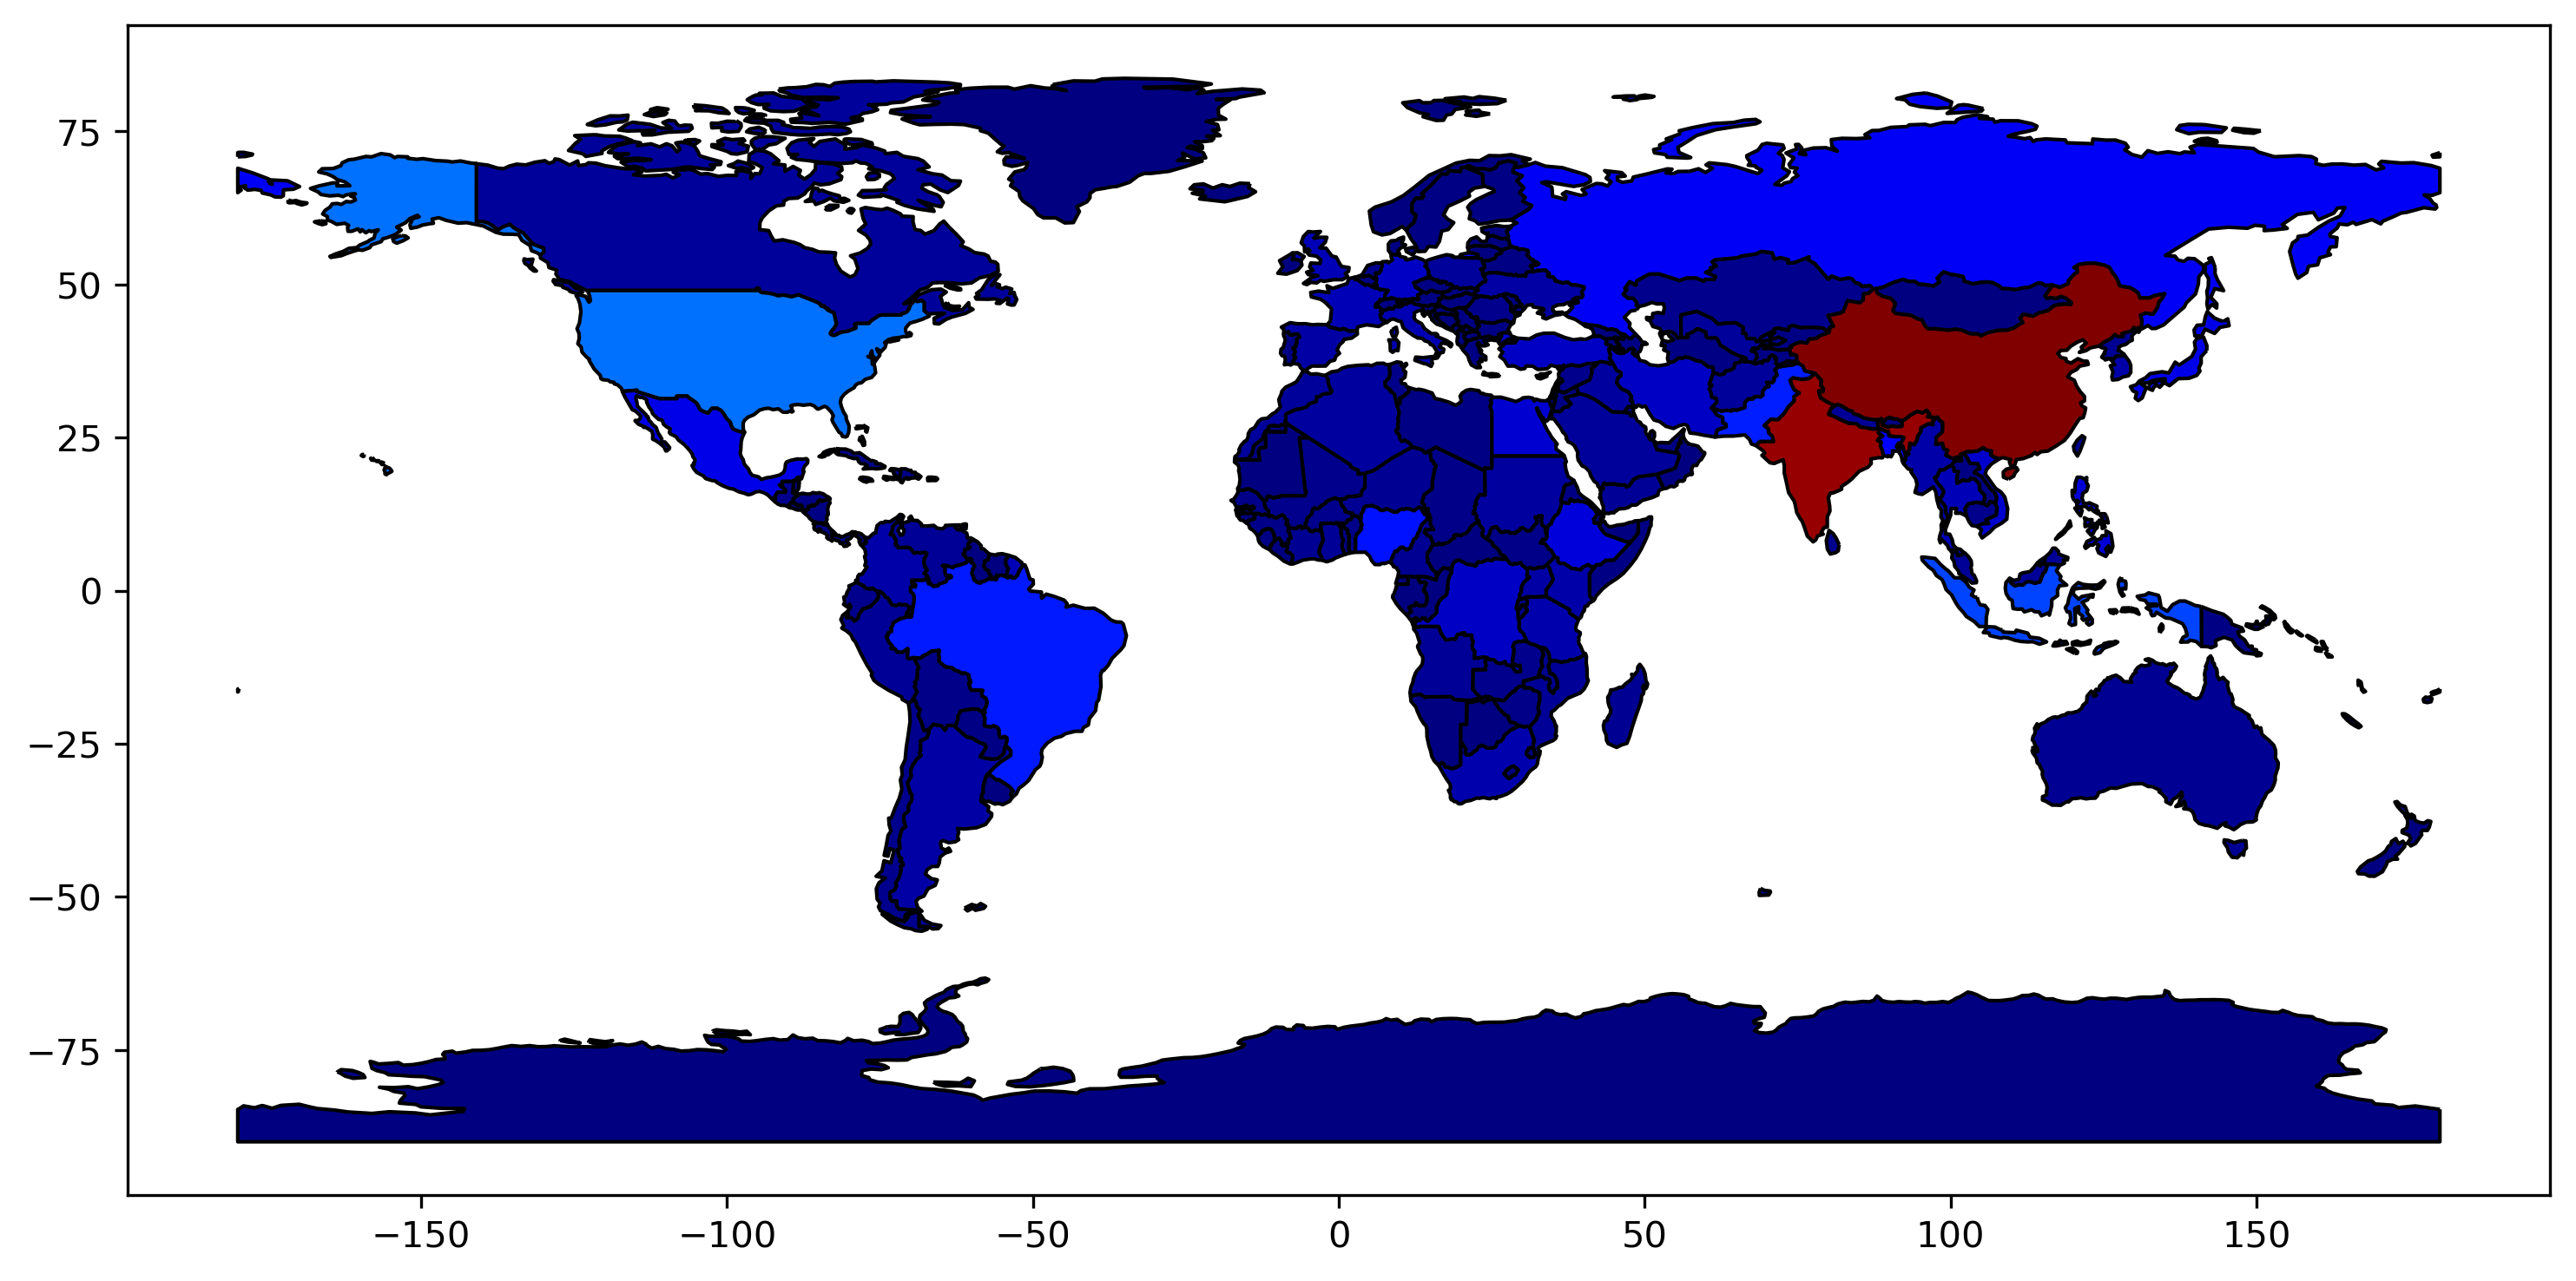

In [48]:
#Super basic plot: See how beautiful and automatic this is?!
fig, ax1 = plt.subplots(1,1, figsize=(12, 10), dpi=300)

gdf.plot(ax = ax1, column = 'pop_est', edgecolor='black', linewidth=1, cmap='jet')

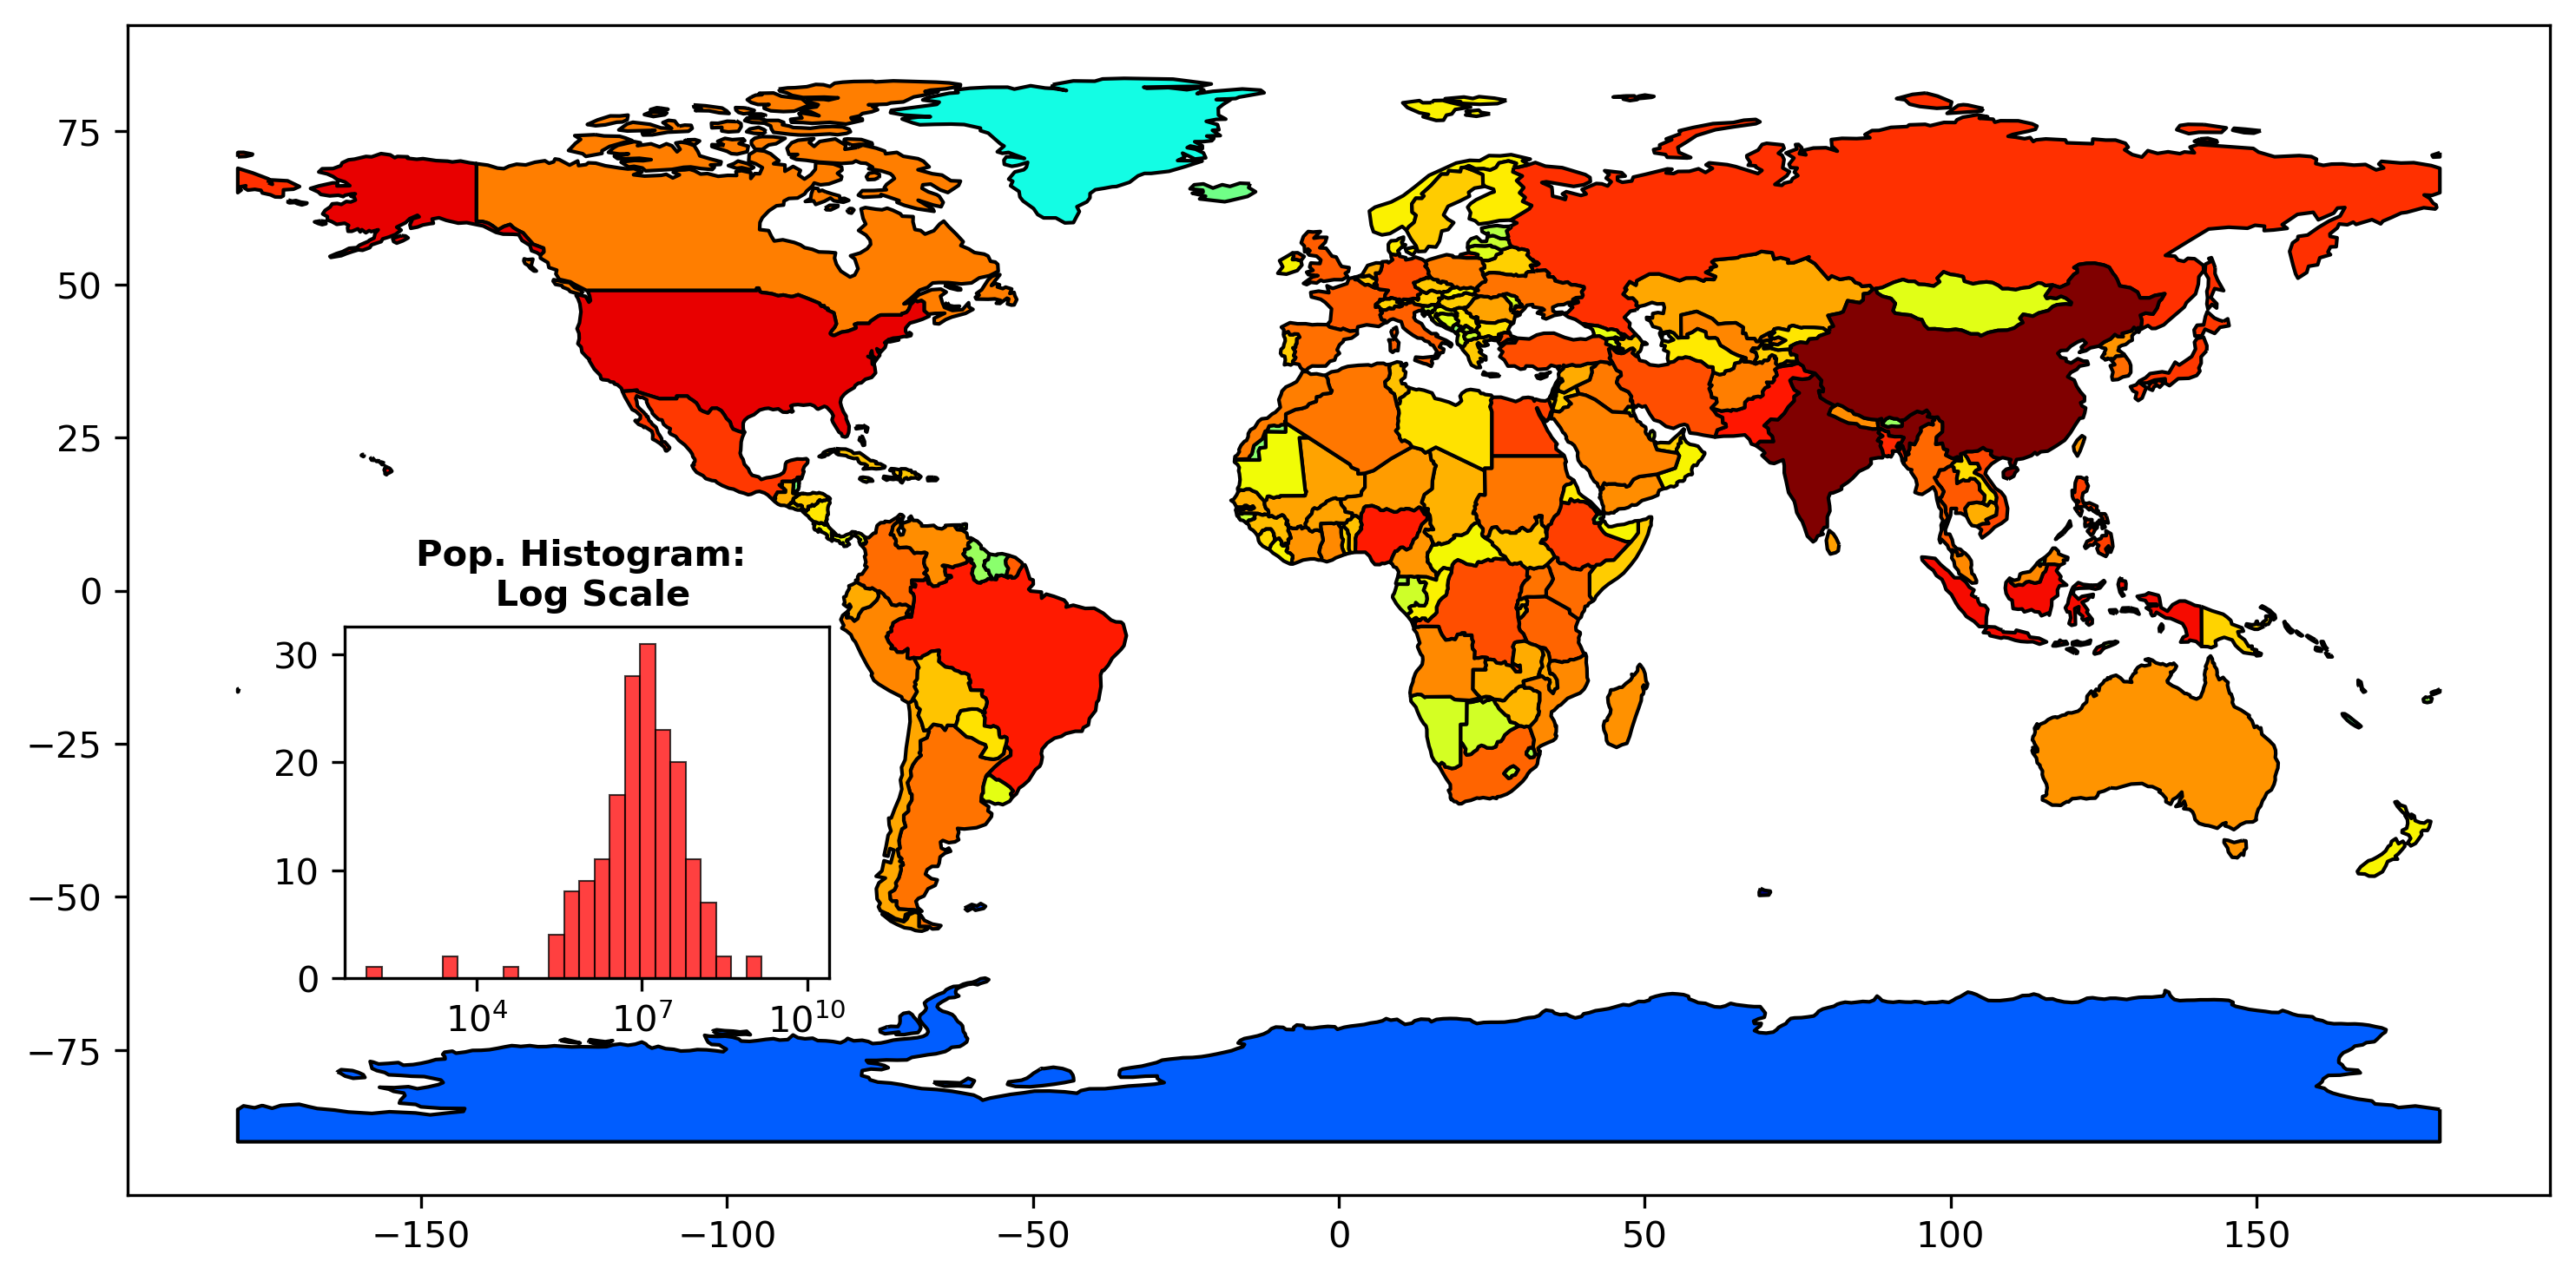

In [52]:
#Now let's inset a histogram of the population estimates:
##########

fig, ax1 = plt.subplots(1,1, figsize=(12, 10), dpi=300)

#Note the added alpha argument:
#Also, we'll use the LOG of population:
gdf.plot(ax = ax1, column = np.log10(gdf.pop_est), edgecolor='black', alpha=1, linewidth=1, cmap='jet')

#Make the inset_axes here:
axins = inset_axes(ax1, width="20%", height="30%", loc=3, borderpad=6)


#Make a histogram on a LOG scale:
######

#Note: Try this vs. the next option:

if (0):
    n, bins, patches = axins.hist(gdf.pop_est, bins = 30, rwidth = 1, facecolor='red', \
                                edgecolor='black', linewidth = .5, alpha=0.75)

    #Set scale to LOG:
    axins.set_xscale('log')

else:
    my_bins = np.logspace(2,10,30)

    n, bins, patches = axins.hist(gdf.pop_est, bins = my_bins, rwidth = 1, facecolor='red', \
                                edgecolor='black', linewidth = .5, alpha=0.75)

    #Set scale to LOG:
    axins.set_xscale('log')
    
axins.set_title('Pop. Histogram: \n Log Scale', fontsize=10, fontweight='bold');


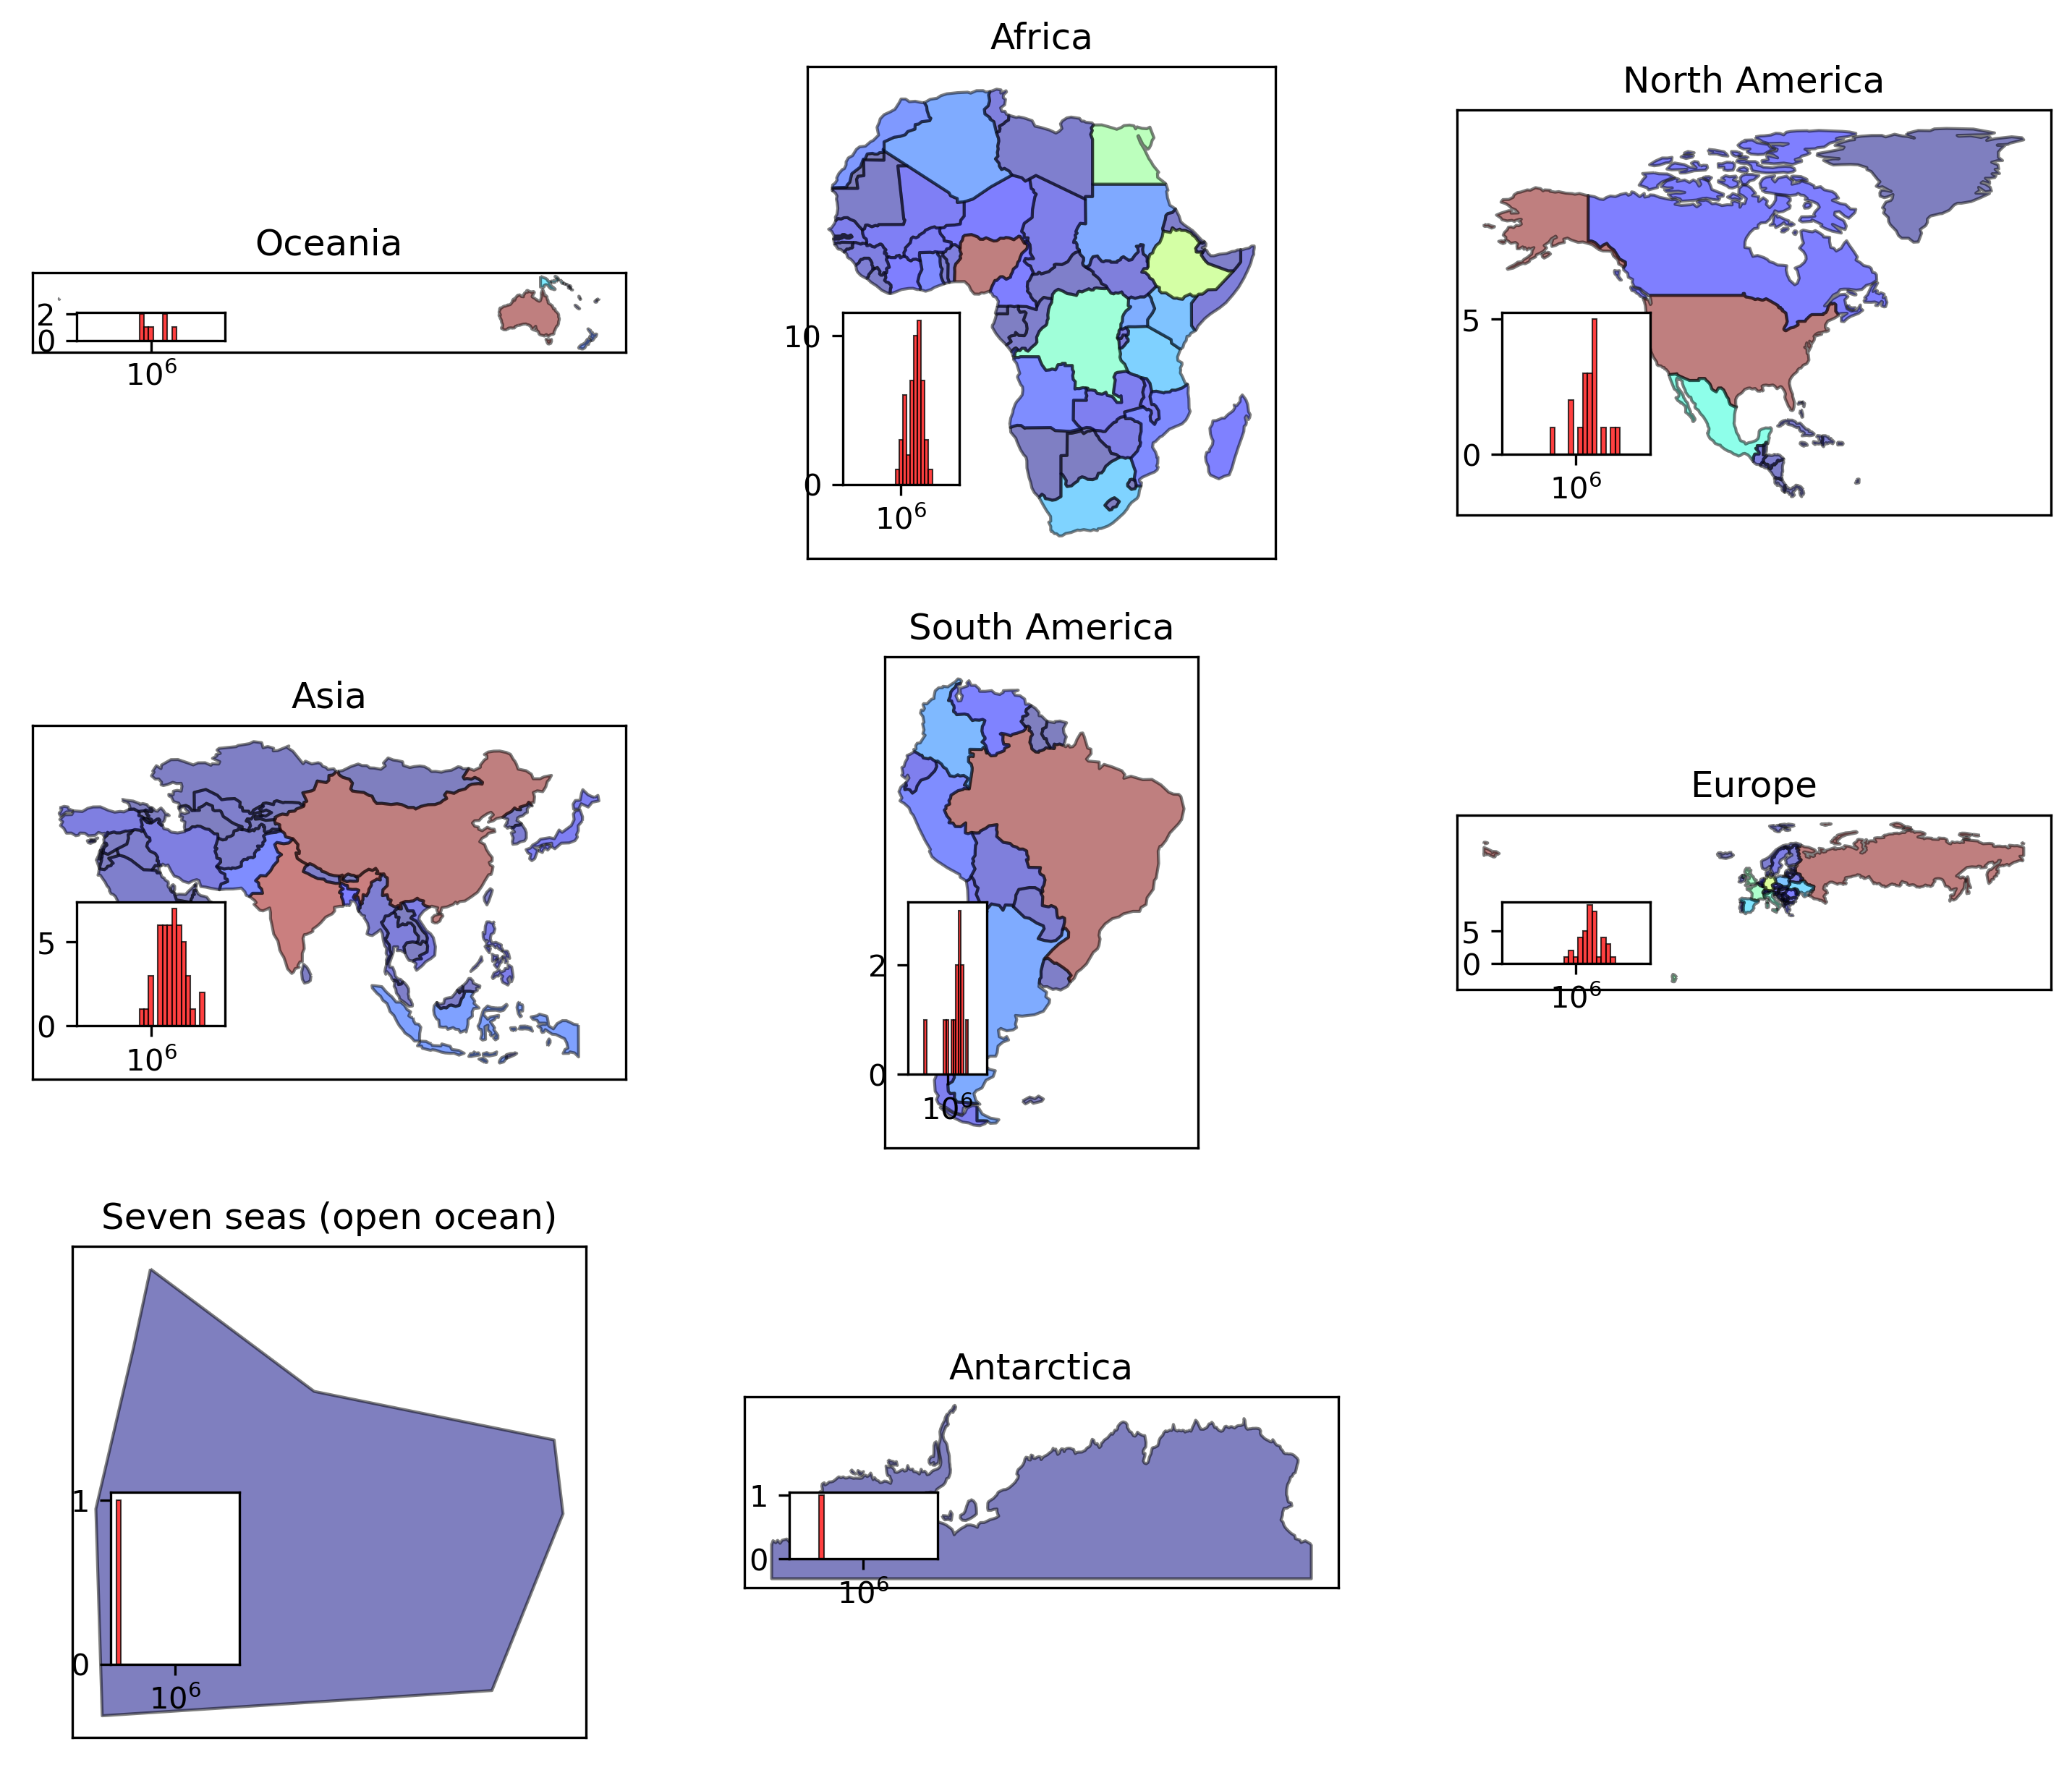

In [54]:
#By Continents...
#######
fig, ax1 = plt.subplots(3,3, figsize=(12, 10), dpi=300)

ax1 = ax1.flatten()

#Note the enumerate: Loop through unique continents:
for i, c in enumerate(gdf.continent.unique()):

    gdf_plot = gdf.loc[gdf['continent'] == c]
    
    gdf_plot.plot(ax = ax1[i], column = 'pop_est', edgecolor='black', alpha=.5, linewidth=1, cmap='jet')
    
    #Throw this in:
    ax1[i].set_xticks([])
    ax1[i].set_yticks([])
    ax1[i].set_title(c)
    
    
    #And inset axes: A different method
    axins = ax1[i].inset_axes([.075, .15, .25, .35])

    #And histogram:
    my_bins = np.logspace(2,10,30)
    axins.hist(gdf_plot.pop_est, bins = my_bins, rwidth = 1, facecolor='red', \
                                edgecolor='black', linewidth = .5, alpha=0.75)
    
    axins.set_xscale('log')

#And:
ax1[8].set_axis_off()

#### Also, `make_axes_locatable`

- Can use this mainly to customize location/size of colorbar

- See https://geopandas.org/en/latest/docs/user_guide/mapping.html for details on adding to colorbar to geopandas plots, as below:

<AxesSubplot: >

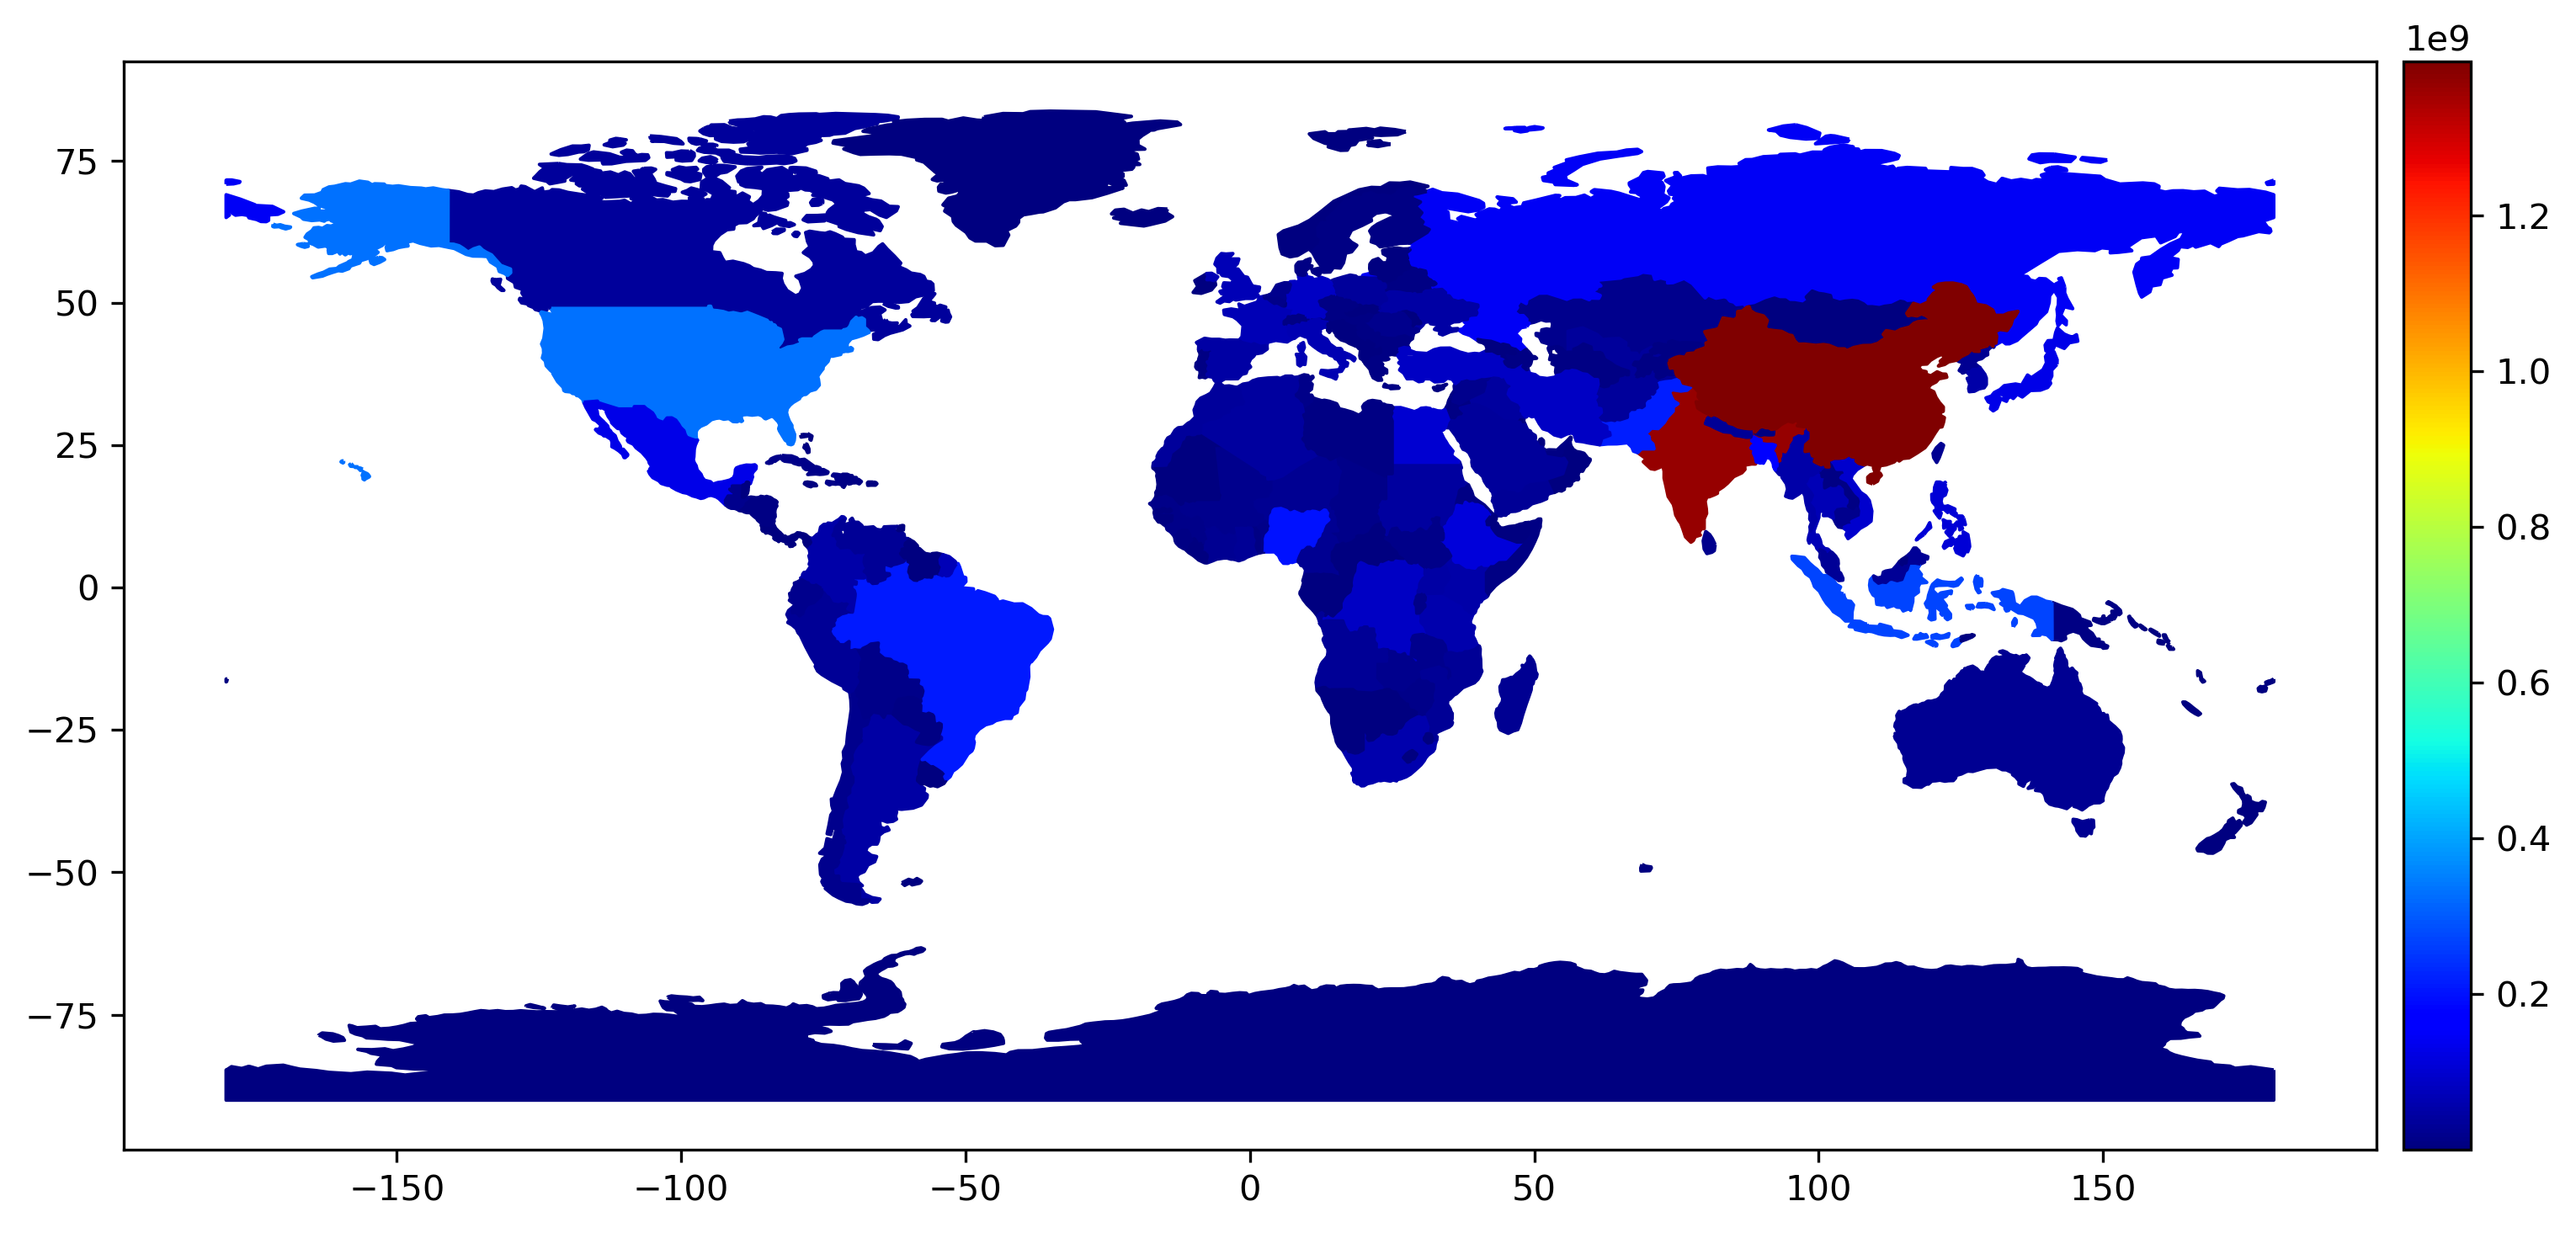

In [57]:
#Import and use make_axes_locatable:
######

from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax1 = plt.subplots(1,1, figsize=(12, 10), dpi=300)

#Pretty colorbar
divider = make_axes_locatable(ax1)
cax1 = divider.append_axes("right", size="3%", pad=0.1)

#Plot:
gdf.plot(ax=ax1, edgecolor='face', column='pop_est', cmap='jet', alpha=1,
                 legend=True, cax=cax1) #, legend_kwds={"orientation": "horizontal"})

#cax1.xaxis.set_ticks_position("top")

#### And super extra advanced subplots...

- Also note some bar plot customization
- And custom colormap

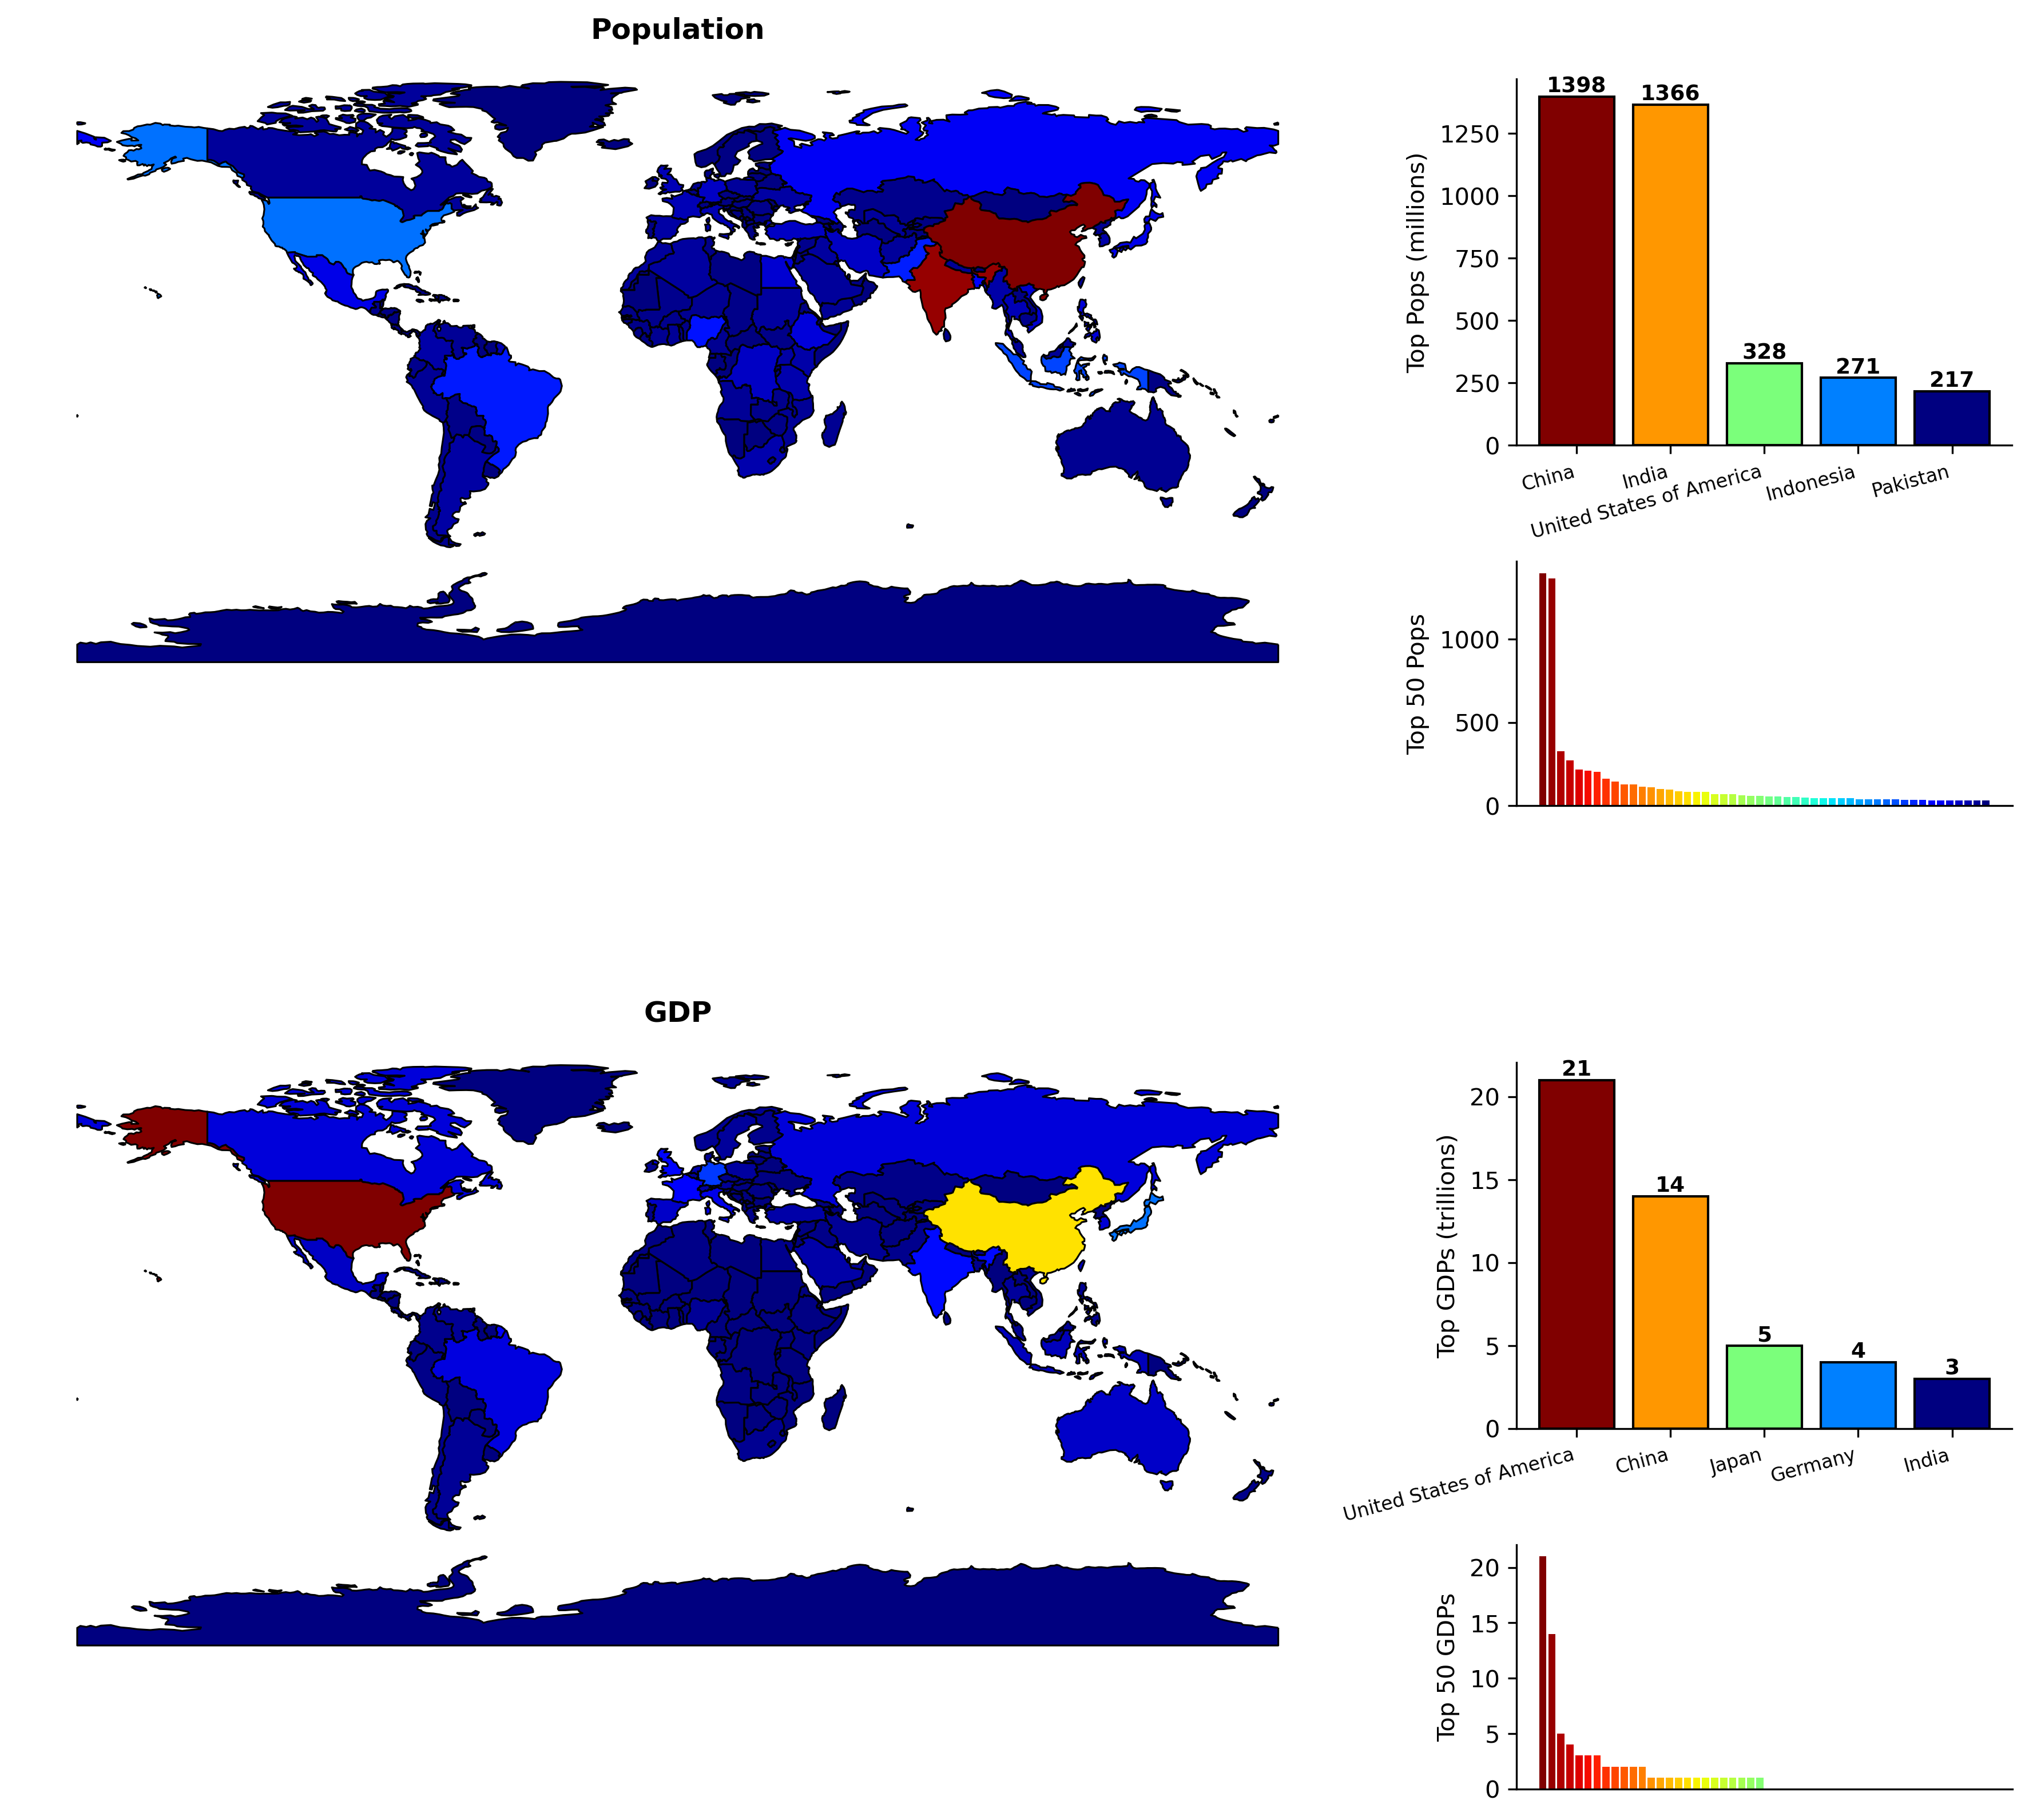

In [58]:
#Observe for reference...
#########

fig = plt.figure(figsize=(15, 14), constrained_layout=False, dpi=300)

widths = [.8, .1, .3]
heights = [.05, .75, .5, .05, .75, .5]

spec = fig.add_gridspec(ncols=3, nrows=6, width_ratios=widths,
                          height_ratios=heights, wspace=0.01, hspace=.55)

#Main Plot 1
ax1 = fig.add_subplot(spec[0:3,0])

#Main Plot 2
ax2 = fig.add_subplot(spec[3:6,0])

#Barplots 1
ax3 = fig.add_subplot(spec[1,2])
ax3b = fig.add_subplot(spec[2,2])

#Barplots 2
ax4 = fig.add_subplot(spec[4,2])
ax4b = fig.add_subplot(spec[5,2])


#Maps:
#####

gdf.plot(ax=ax1, column='pop_est', edgecolor='black', linewidth=.75, alpha=1, cmap='jet')
ax1.set_axis_off()
ax1.set_title('Population', fontweight='bold')

gdf.plot(ax=ax2, column='gdp_md_est', edgecolor='black', linewidth=.75, alpha=1, cmap='jet')
ax2.set_axis_off()
ax2.set_title('GDP', fontweight='bold')


##############
#Top barplots
###############

gdf = gdf.sort_values(by = 'pop_est', ascending=False)

X = 5

#A colormap:
from matplotlib import cm
my_cmap = cm.get_cmap('jet_r', X)

#Colored bar plot:
ax3.bar(gdf['name'].iloc[0:X], np.round(gdf['pop_est'].iloc[0:X] / 1e6), edgecolor='black',
            color=my_cmap([i for i in range(X)]))

#Add top numbers:
for container in ax3.containers[0:X]:
    ax3.bar_label(container, fontweight='bold', fontsize=9)
        
#Labels:
ax3.set_ylabel('Top Pops (millions)')
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
   
ax3.set_xticks(ax3.get_xticks(), ax3.get_xticklabels(), rotation=15, ha='right', fontsize=8);

##

X = 50
my_cmap = cm.get_cmap('jet_r', X)

ax3b.bar(gdf['name'].iloc[0:X], np.round(gdf['pop_est'].iloc[0:X] / 1e6),
            color=my_cmap([i for i in range(X)]))


ax3b.set_ylabel('Top 50 Pops')
ax3b.spines['top'].set_visible(False)
ax3b.spines['right'].set_visible(False)
ax3b.set_xticks([])


###############
#Bottom barplots
###############

#Just a hacky cut-and-paste job of above
#And modified to hard code gdp_est

gdf = gdf.sort_values(by = 'gdp_md_est', ascending=False)

X = 5

#A colormap:
from matplotlib import cm
my_cmap = cm.get_cmap('jet_r', X)

#Colored bar plot:
ax4.bar(gdf['name'].iloc[0:X], np.round(gdf['gdp_md_est'].iloc[0:X] / 1e6), edgecolor='black',
            color=my_cmap([i for i in range(X)]))

#Add top numbers:
for container in ax4.containers[0:X]:
    ax4.bar_label(container, fontweight='bold', fontsize=9)
        
ax4.set_ylabel('Top GDPs (trillions)')
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
   
ax4.set_xticks(ax4.get_xticks(), ax4.get_xticklabels(), rotation=15, ha='right', fontsize=8);


##

X = 50
my_cmap = cm.get_cmap('jet_r', X)

ax4b.bar(gdf['name'].iloc[0:X], np.round(gdf['gdp_md_est'].iloc[0:X] / 1e6),
            color=my_cmap([i for i in range(X)]))


ax4b.set_ylabel('Top 50 GDPs')
ax4b.spines['top'].set_visible(False)
ax4b.spines['right'].set_visible(False)
ax4b.set_xticks([]);

### Text, annotation, and drawing

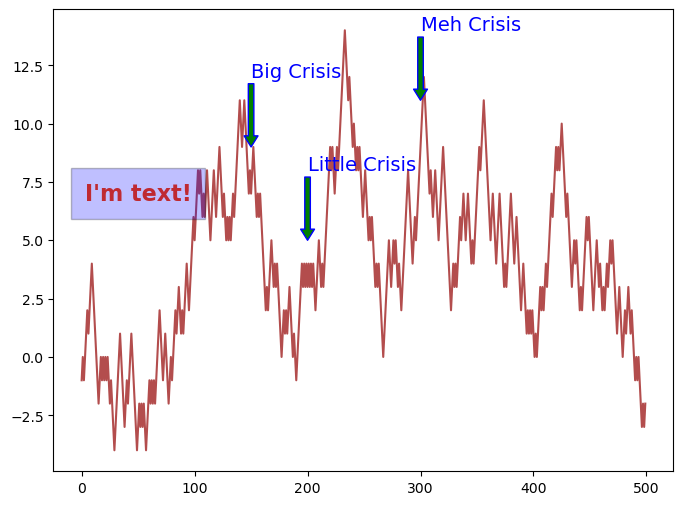

In [65]:
#Add some annotations to a random walk time-series
##########

#Note the cumsum() method:
######

N = 500
data = np.random.choice([-1,1], N).cumsum()
t = np.arange(N)

fig1, ax1 = plt.subplots(1, 1, figsize=(8,6)) #, dpi=300)

ax1.plot(t, data, color=(.7, .3, .3))


#Add some text:
####

N1 = 50

x = t[N1]; y = data[N1] + 10
text_str = 'I\'m text!'

#Could do:
#ax1.text(x, y, text_str, fontsize=16)

#Fancier:
ax1.text(x, y, text_str, fontsize=16, color=(.75, 0.1, 0.1, .9), fontweight='bold',
         bbox={'facecolor':'blue','alpha':.25,'edgecolor':'black','pad':10},
         ha='center', va='center')


#Add some "Annotations"
#########

crisis_data = ((150, 'Big Crisis'), (200, 'Little Crisis'), (300, 'Meh Crisis'))

for n, label in crisis_data:
    ax1.annotate(label, xy = (n, data[n] + 2),
                        xytext = (n, data[n] + 5),
                        arrowprops = dict(facecolor='green', edgecolor='blue', headwidth=10, width=4, headlength=8),
                        fontsize=14, color='blue')

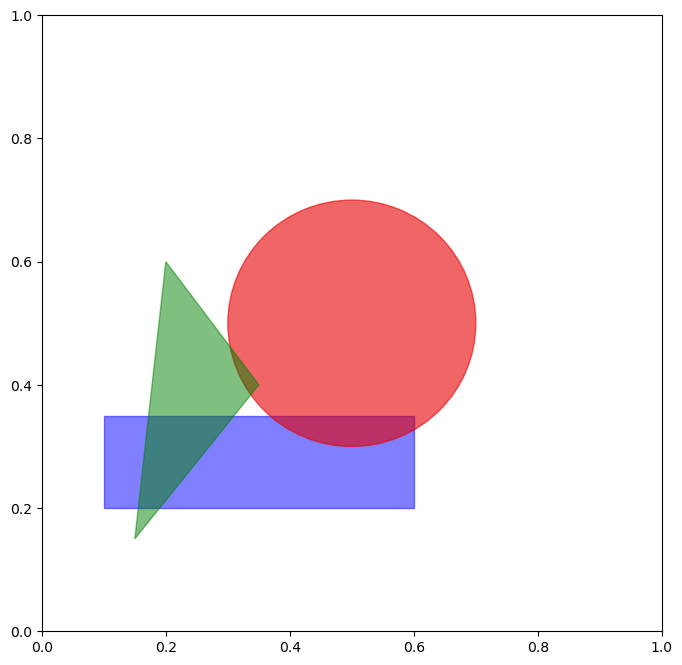

In [66]:
#Can make shapes:
################

fig = plt.figure(figsize = (8,8))

ax1 = fig.add_subplot(1,1,1)

rect = plt.Rectangle((0.1, .2), .5, .15, color='blue', alpha=.5)
circ = plt.Circle((.5, .5), .2, color=(.9, .0, .0), alpha=.6)
pgon = plt.Polygon([[.15, .15], [.35, .4], [.2, .6]], color='green', alpha=.5)

ax1.add_patch(rect)
ax1.add_patch(circ)
ax1.add_patch(pgon)

### Custom Legends

Here's one way to make a custom legend:

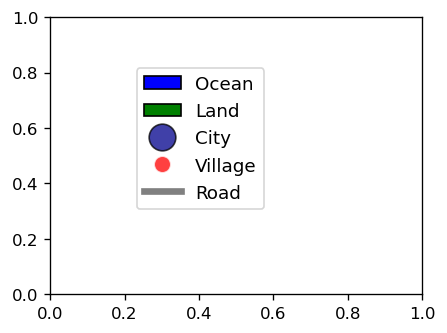

In [67]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

fig1, ax1 = plt.subplots(1, 1, figsize=(4,3), dpi=120)

#Make our legend elements: A collection of Patches and Line2Ds
legend_elements = [Patch(facecolor='blue', edgecolor='black', alpha=1, label='Ocean'),
                   Patch(facecolor='green', edgecolor='black', alpha=1, label='Land'),
                   
                   Line2D([0], [0], alpha=.75, marker='o', color='w', label='City',
                          markeredgecolor='black', markerfacecolor='darkblue', markersize=16),
                   Line2D([0], [0], alpha=.75, marker='o', color='w', label='Village',
                          markerfacecolor='red', markersize=10),
                   
                   Line2D([0], [0], alpha=1, color='grey', label='Road', linewidth=4)]


#Like so:
#ax1.legend(handles=legend_elements, fontsize=11, loc='lower left') #Or loc=3

#Or so:
ax1.legend(handles=legend_elements, fontsize=11, bbox_to_anchor=(0.6, .85))


### Custom Colormaps

Some convienent ways to get a custom colormap:

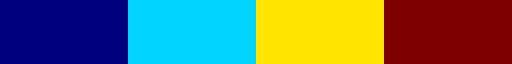

In [72]:
from matplotlib import cm
from matplotlib.colors import ListedColormap

my_cmap = cm.get_cmap('jet', 4)

my_cmap

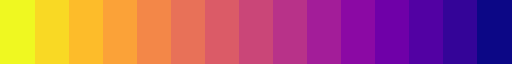

In [75]:
my_cmap = cm.get_cmap('plasma_r', 15)

my_cmap

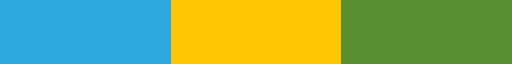

In [74]:
#Listed:
####

vals = [[46/255, 169/255, 222/255],
        [255/255, 199/255, 2/255],
        [88/255, 143/255, 48/255]]

my_cmap = ListedColormap(vals)

my_cmap

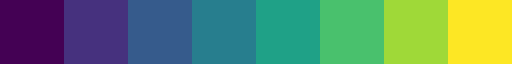

In [76]:
#Note this hack to add alpha:
####

#Start with:
my_cmap = cm.get_cmap('viridis', 8)
my_cmap


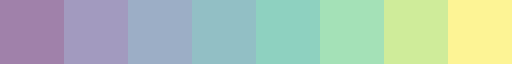

In [80]:
#Now add an alpha:
new_map = [list(my_cmap(i))[:3] + [.5] for i in range(8)]

my_cmap = ListedColormap(new_map)
my_cmap

## Saving plots: Important!

Use something like:

```
plt.savefig('My_Fig.png', dpi=300, facecolor="white", bbox_inches='tight', pad_inches=0.05)
```